# Classification using Logistic Regression

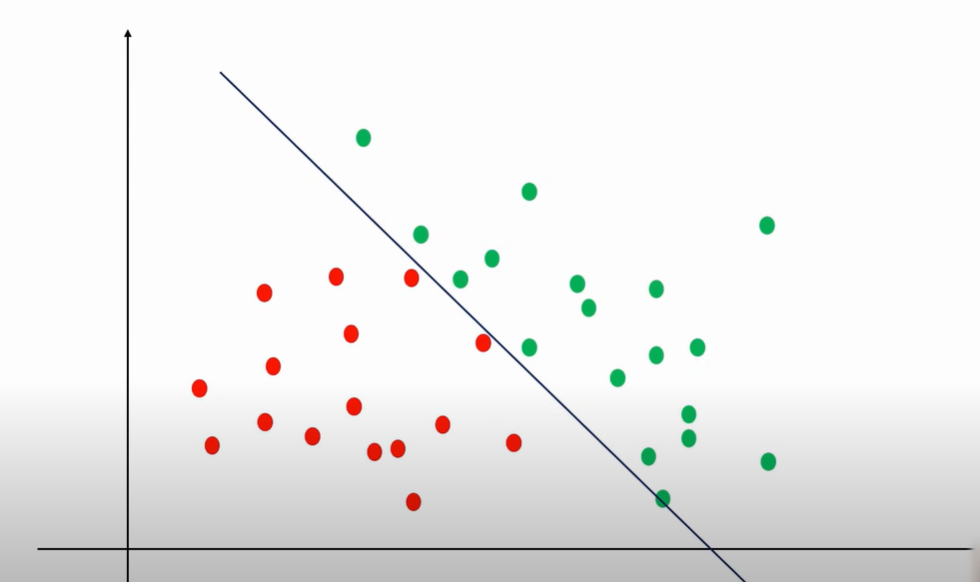

# Classification using Decision Trees : Creates Decision Boundaries

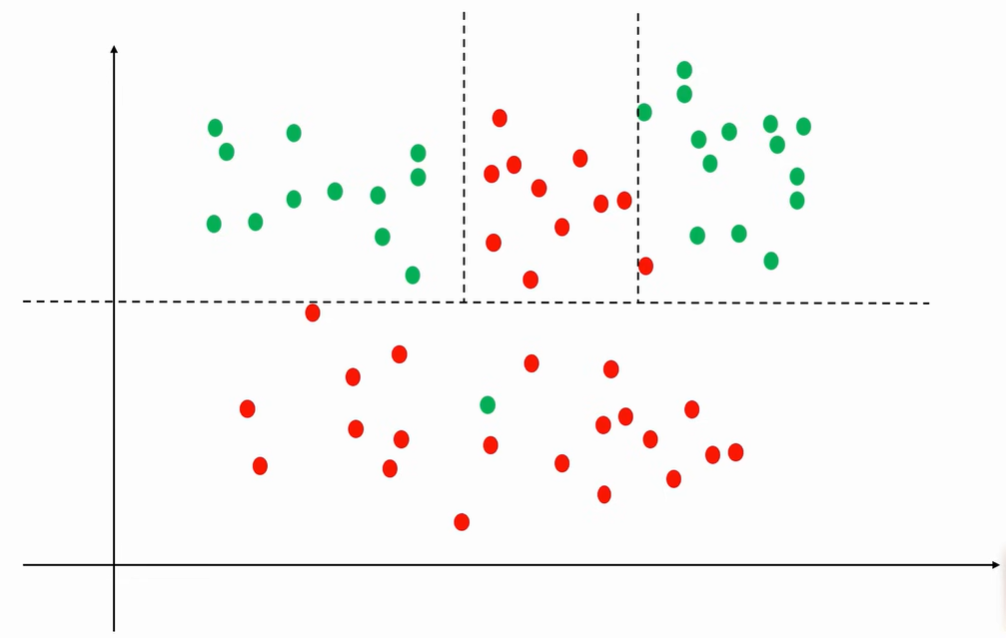

# Example Dataset

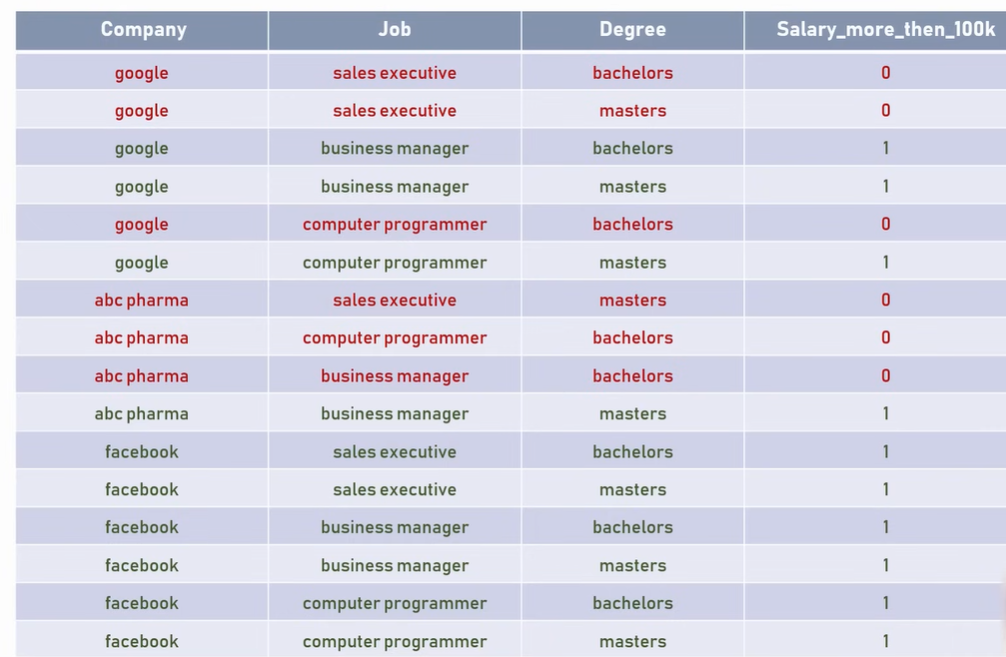

# Decision Tree for the above given example dataset

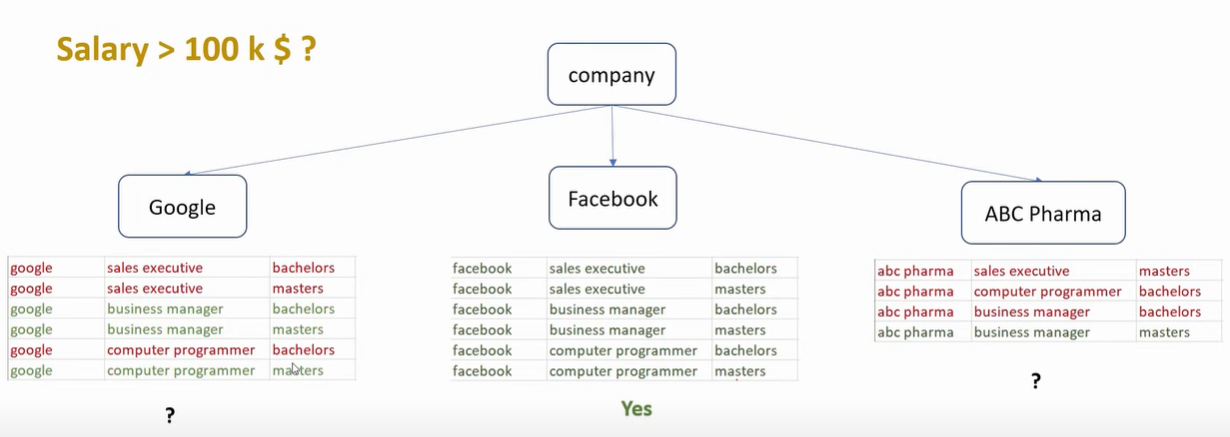

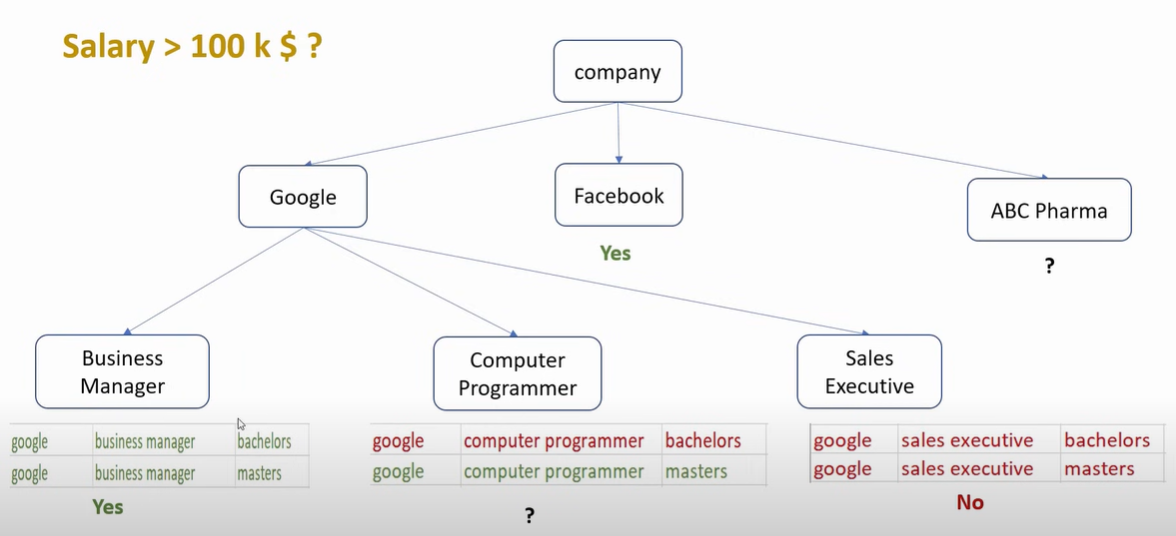

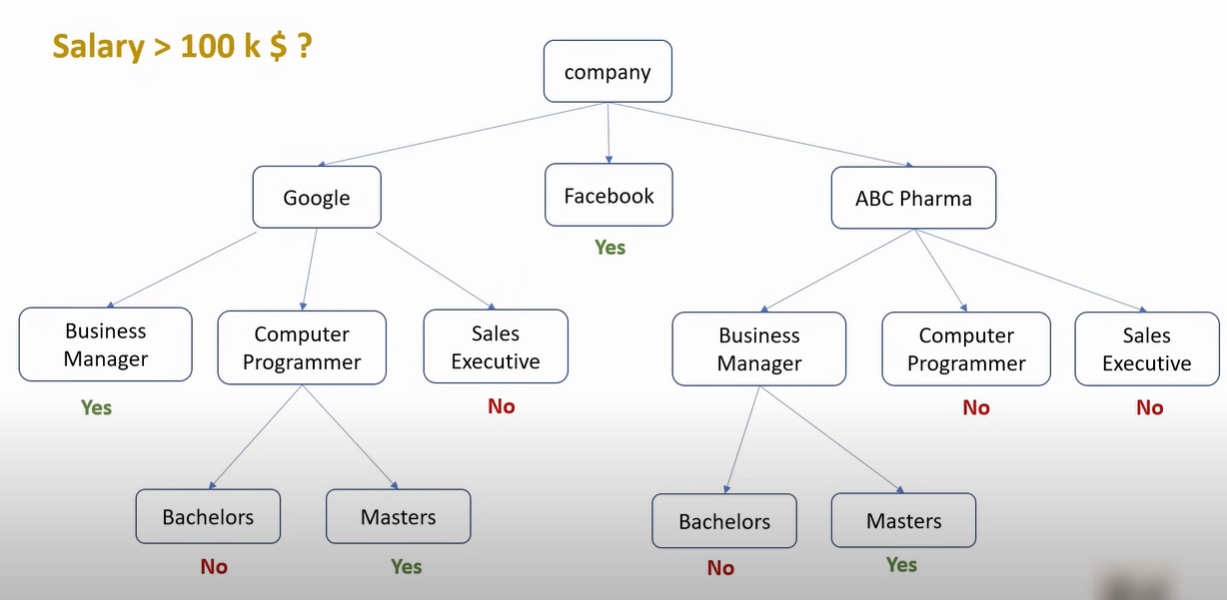

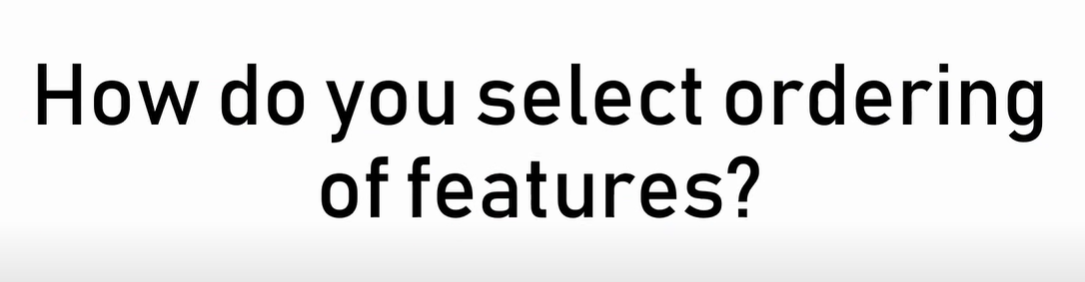

# A dataset with all its samples having the same labels is considered to have Low Entropy (Measure of Randomness)

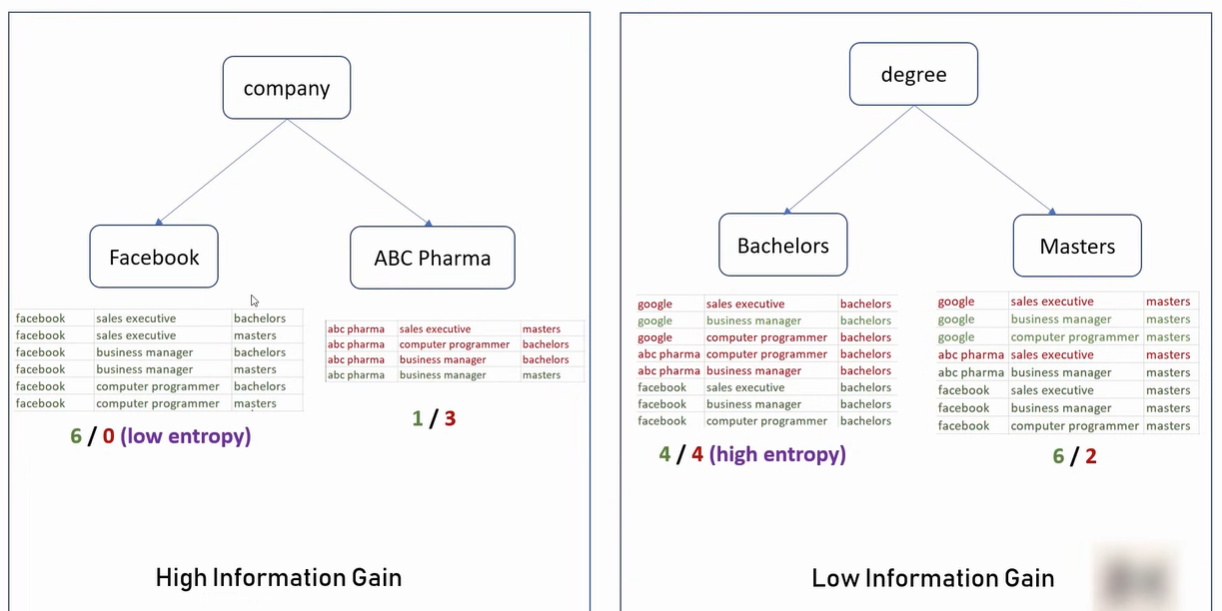

# Here, Company attribute would be more effective in classifying the data in this example as there is High Information Gain

# The attribute that gives High information gain should be selected at every split 

# Entropy measures the disorder in a dataset, while Information Gain measures the effectiveness of attributes in reducing this disorder.

# Attributes refer to the characteristics or features of the data that are used to describe or differentiate instances in a dataset. These attributes are the variables that define the properties of the data points being analyzed.

# Decision tree algorithms use entropy and information gain to decide how to split data at each node.

# They choose the attribute that maximizes information gain, as it leads to the most effective organization of data and consequently better classification.

# Entropy

- Entropy is a measure of uncertainty or disorder in a dataset.
- In the context of decision trees, entropy is used to quantify the impurity of a collection of examples.
- Entropy is highest when the dataset is evenly split between classes (maximum uncertainty), and it is lowest when the dataset contains only examples of one class (minimum uncertainty).

# Information Gain 

- Information gain measures the effectiveness of a particular attribute in classifying the data.
- It quantifies the reduction in entropy (or uncertainty) achieved after splitting the dataset on a particular attribute.
- Higher information gain implies that using that attribute for splitting the dataset results in greater reduction in entropy, i.e., more organization or better classification.

# High Entropy & Low Information Gain

- High entropy implies high uncertainty or disorder in the dataset.
- When entropy is high, information gain tends to be low because there is less to gain by splitting the dataset based on any single attribute.
- In such cases, the dataset is more disordered, and attributes don't offer much help in organizing the data into meaningful classes.

# Low Entropy & High Information Gain

- Low entropy implies low uncertainty or high organization in the dataset.
- When entropy is low, information gain tends to be high because there is more to gain by splitting the dataset based on attributes.
- In such cases, the dataset is well-structured, and attributes are effective in classifying the data into distinct classes.

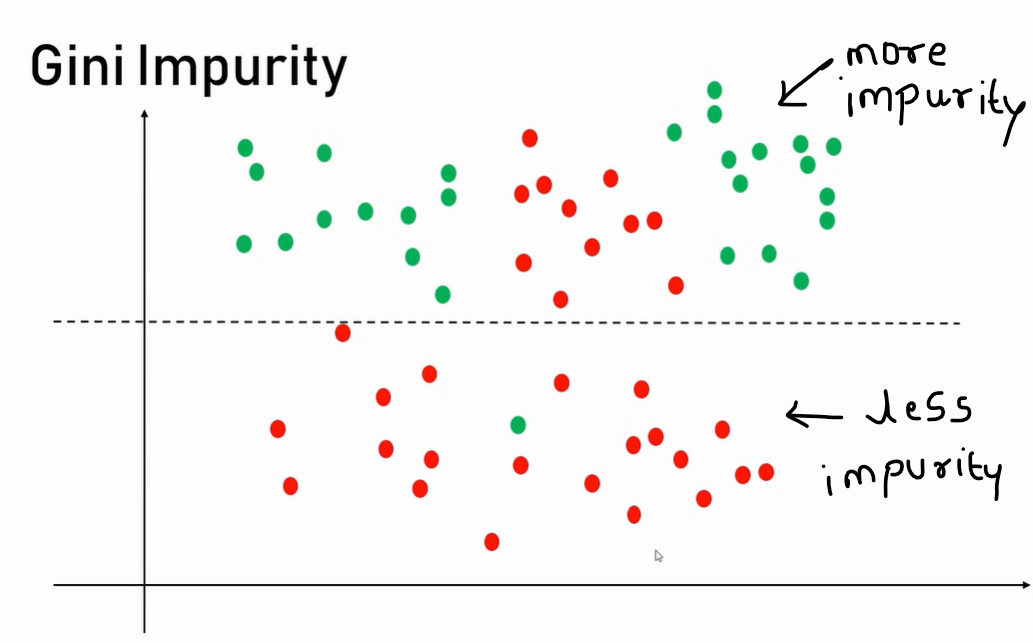

# Implementation of Decision Tree

In [1]:
import pandas as pd
data = pd.read_csv("salaries.csv")
data.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


# Splitting the Dataset into Independent Variables (Data) and Target Variable (Label)

In [2]:
independent_variables = data.drop('salary_more_then_100k', axis = 'columns')
target_variable = data['salary_more_then_100k']

In [3]:
independent_variables.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [4]:
target_variable.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

# As ML algorithms can only work with numbers we'll convert the feature values into numbers using Label Encoder from sklearn

In [5]:
from sklearn.preprocessing import LabelEncoder

# As we have 3 features / independent variables, we have to create Label encoders for each of these features

In [6]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

# Add the encoded values for all the features in the training data

In [7]:
independent_variables['company_le'] = le_company.fit_transform(independent_variables['company'])

In [8]:
independent_variables['job_le'] = le_company.fit_transform(independent_variables['job'])

In [9]:
independent_variables['degree_le'] = le_company.fit_transform(independent_variables['degree'])

In [10]:
independent_variables.head()

,company,job,degree,company_le,job_le,degree_le
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [11]:
independent_variables['company'].unique()

array(['google', 'abc pharma', 'facebook'], dtype=object)

## This is how the values in the company column have been encoded using Label Encoder
- abc pharma - 0
- facebook - 1
- google - 2


# Drop the original columns and only keep the label encoded columns

In [12]:
independent_variables_le = independent_variables.drop(['company', 'job', 'degree'], axis = 'columns')

In [13]:
independent_variables_le.head()

,company_le,job_le,degree_le
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


# Splitting the Dataset into Train & Test data

In [14]:
from sklearn.model_selection import train_test_split

In [34]:
validation_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(independent_variables_le, target_variable, test_size=validation_size, random_state = 42, stratify = target_variable)

In [35]:
X_test

,company_le,job_le,degree_le
7,0,1,0
12,1,0,0
6,0,2,1
10,1,2,0


# Training the Decision Tree Classifier

In [16]:
from sklearn import tree

In [17]:
model = tree.DecisionTreeClassifier()

In [18]:
# model.fit(independent_variables_le, target_variable) # If you want to train the classifier on the entire dataset
model.fit(X_train, Y_train) # If you want to train the model only on the Training Dataset

DecisionTreeClassifier()

# Testing the model on the Test Dataset

In [19]:
model.score(X_test, Y_test)

0.5

# Making Predictions with the Trained Classifier

# We'll have to provide the Label Encoded values to the model

# The model expects the input data (data on which predictions are to be made) to be provided in a the form of a 2D array. 

In [20]:
independent_variables

,company,job,degree,company_le,job_le,degree_le
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


# Label encoded values for company column
- abc pharma - 0
- facebook - 1
- google - 2

# Label encoded values for job column

- business manager - 0
- computer programmer - 1
- sales executive - 2

# Label encoded values for degree column

- bachelors - 0
- masters - 1


In [21]:
model.predict([[1, 2, 0]])

c:\Users\OMOLP094\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [22]:
target_variable

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

# A person who has a bachelors degree and works as a sales executives in facebook doesn't have salary more than 100k dollars

In [36]:
X_test

,company_le,job_le,degree_le
7,0,1,0
12,1,0,0
6,0,2,1
10,1,2,0


In [24]:
model.predict(X_test)

array([0, 1, 1, 0], dtype=int64)

In [25]:
Y_test

7     0
12    1
6     0
10    1
Name: salary_more_then_100k, dtype: int64

# The classifier only made incorrect prediction for 1 data sample (3rd row or row marked with index 6) from all the 4 test data samples

<hr>
<hr>

# stratify parameter of train_test_split function explanation

- The stratify parameter in the train_test_split function from sklearn.model_selection is used to ensure that the proportion of classes in the training and testing sets is the same as in the original dataset. This is particularly important when dealing with imbalanced datasets, where some classes are underrepresented.

- When you specify the stratify parameter, you pass the target variable (usually your labels) to it. This ensures that the split is done in such a way that both the training and testing sets have a similar distribution of the classes as the original dataset.

# Example to understand 'stratify' parameter

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Create a sample DataFrame with imbalanced classes
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Label': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Define the features and the target variable
data = df[['Feature1', 'Feature2']]  # Features
labels = df['Label']  # Target variable

# Split the data into training and testing sets without stratification
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)
print("Without stratification:")
print("y_train:\n", train_labels.value_counts())
print("y_test:\n", test_labels.value_counts())

# Split the data into training and testing sets with stratification
train_data_strat, test_data_strat, train_labels_strat, test_labels_strat = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)
print("\nWith stratification:")
print("y_train_strat:\n", train_labels_strat.value_counts())
print("y_test_strat:\n", test_labels_strat.value_counts())


Without stratification:
y_train:
 Label
0    4
1    3
Name: count, dtype: int64
y_test:
 Label
1    2
0    1
Name: count, dtype: int64

With stratification:
y_train_strat:
 Label
1    4
0    3
Name: count, dtype: int64
y_test_strat:
 Label
0    2
1    1
Name: count, dtype: int64


<hr>
<hr>

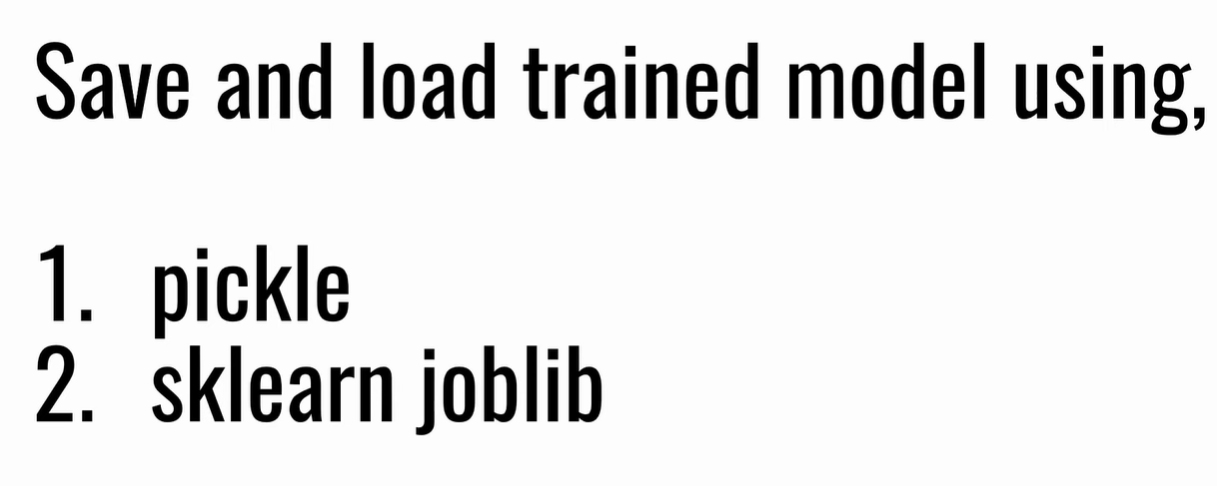

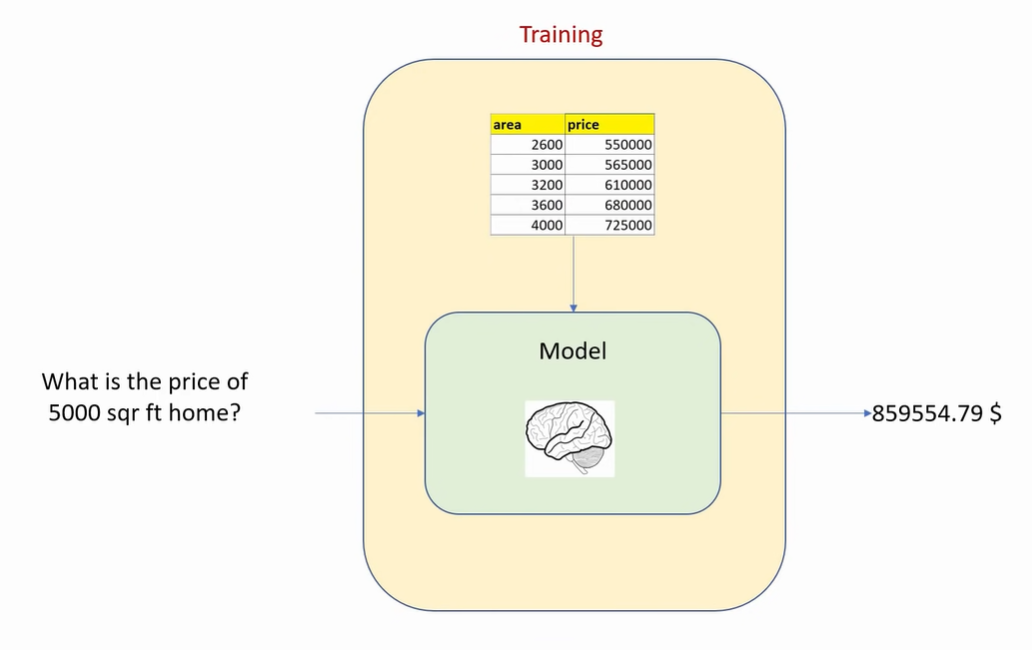

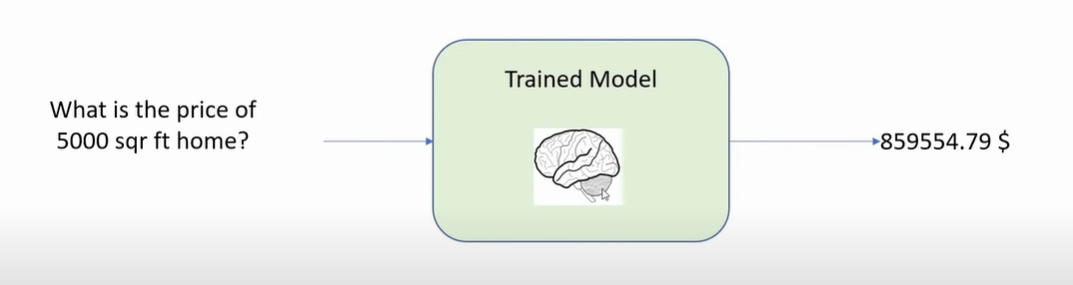

# Python's pickle module allows you to serialize your python objects into a file

# Python's pickle module is incredibly useful for serializing and deserializing Python objects. It allows you to convert Python objects into a stream of bytes (serialization), which you can then store in a file or send over a network. Later, you can reconstruct the original Python object from this stream of bytes (deserialization).

In [27]:
import pickle

# Saving the ML model in pickle format using pickle library

In [29]:
with open('decision_tree_model_pickle_format', 'wb') as f:
    pickle.dump(model, f)

# Loading the model saved in pickle format

In [30]:
with open('decision_tree_model_pickle_format', 'rb') as f:
    loaded_model = pickle.load(f)

In [37]:
X_test

,company_le,job_le,degree_le
7,0,1,0
12,1,0,0
6,0,2,1
10,1,2,0


In [38]:
loaded_model.predict(X_test)

array([0, 1, 1, 0], dtype=int64)

In [40]:
Y_test

7     0
12    1
6     0
10    1
Name: salary_more_then_100k, dtype: int64

# The model saved in pickle format can be shared with anyone who wants to use the model to make predictions

# Saving the ML model using sklearn's joblib

# If the model contains large number of numpy arrays, saving it with sklearn's joblib will make it perform better

# You should directly use `import joblib` instead of `from sklearn.externals import joblib`

In [42]:
import joblib

# Unlike pickle, joblib can directly take the file name with which you want to save your model

In [43]:
joblib.dump(model, 'decision_tree_model_joblib_format')

['decision_tree_model_joblib_format']

In [44]:
loaded_model = joblib.load('decision_tree_model_joblib_format')

In [45]:
loaded_model.predict(X_test)

array([0, 1, 1, 0], dtype=int64)

# Both pickle & joblib save the model in binary format, so if you open the saved model file using any text editor, it will have some text you will not understand

# Accessing a row from the test dataset using `iloc` that will be used as a test sample for testing the model 

In [46]:
X_test.shape

(4, 3)

In [47]:
test_sample = X_test.iloc[3]

In [48]:
test_sample

company_le    1
job_le        2
degree_le     0
Name: 10, dtype: int32

In [49]:
test_sample.shape

(3,)

In [50]:
type(test_sample)

pandas.core.series.Series

# We have to provide the test_sample to the predict function in a particular shape (2D array), that's why we reshape the test sample as a 2D array and then provide the reshaped version of it to the predict function to predict the class of that test sample data

In [51]:
test_sample_reshaped = test_sample.values.reshape(1, -1)

In [52]:
test_sample_reshaped

array([[1, 2, 0]])

In [53]:
test_sample_reshaped.shape

(1, 3)

# Predicted label for the test sample (4th row from the test dataset)

In [54]:
loaded_model.predict(test_sample_reshaped)

c:\Users\OMOLP094\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [55]:
Y_test.shape

(4,)

# Actual label for the test sample (4th row from the test dataset)

In [58]:
Y_test.iloc[3]

1